## Bike Sharing Prediction

## 1. Read the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_df = pd.read_csv('day.csv')

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 2. EDA and Preparation

In [8]:
#x = sns.pairplot(bike_df)
#x.fig.set_size_inches(12, 8)
#plt.show()

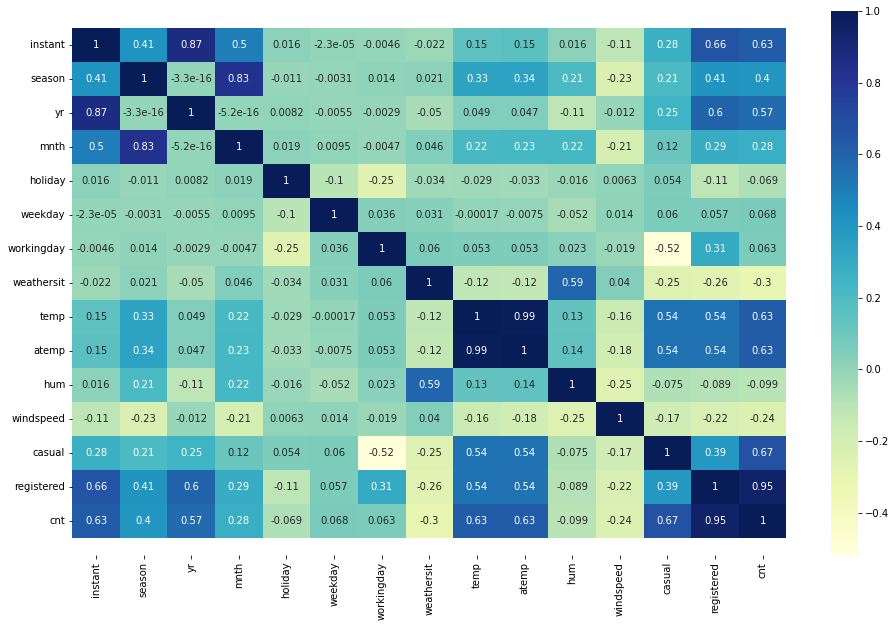

In [9]:
# to see the co-relation values of the dataframe
plt.figure(figsize = (16, 10))
cor=bike_df.corr()
ax=sns.heatmap(cor, annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

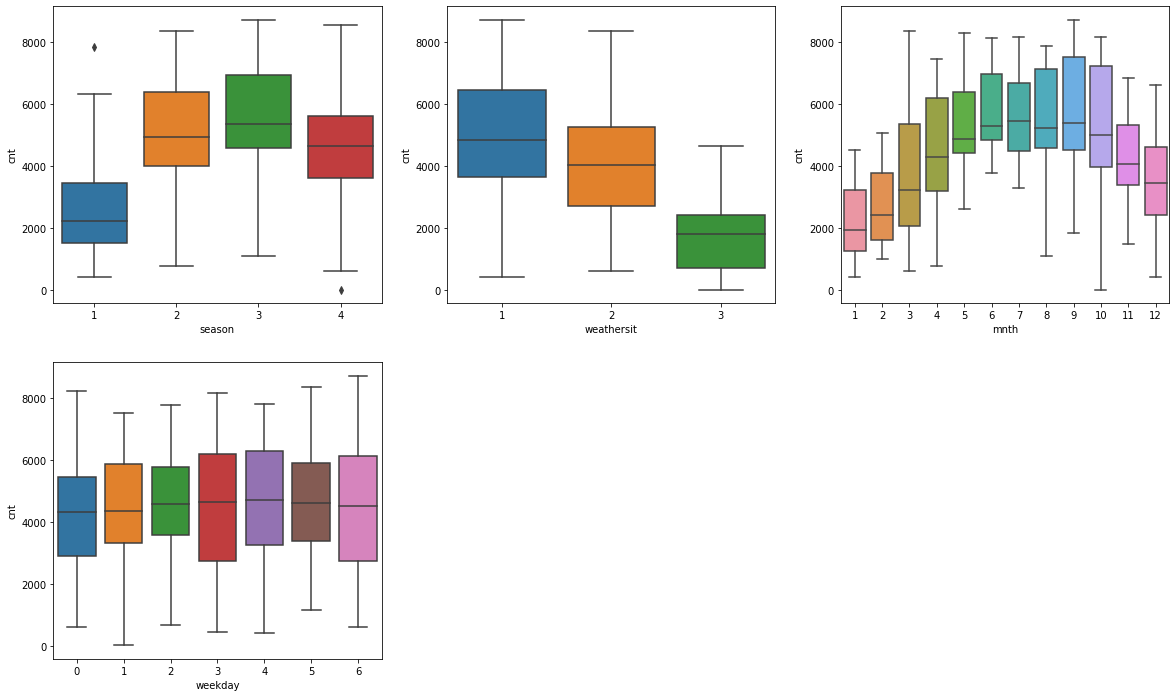

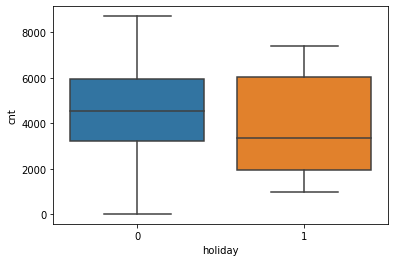

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x="season",y="cnt",data=bike_df)
plt.subplot(2,3,2)
sns.boxplot(x="weathersit",y="cnt",data=bike_df)
plt.subplot(2,3,3)
sns.boxplot(x="mnth",y="cnt",data=bike_df)
plt.subplot(2,3,4)
sns.boxplot(x="weekday",y="cnt",data=bike_df)
plt.show()
sns.boxplot(x="holiday",y="cnt",data=bike_df)
plt.show()

In [11]:
bike_df_updated = bike_df.drop(['instant', 'dteday', 'casual','registered'], axis = 1)

In [12]:
# Convert to 'category' data type

bike_df_updated['season']=bike_df_updated['season'].astype('category')
bike_df_updated['weathersit']=bike_df_updated['weathersit'].astype('category')
bike_df_updated['mnth']=bike_df_updated['mnth'].astype('category')
bike_df_updated['weekday']=bike_df_updated['weekday'].astype('category')

In [13]:
bike_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [14]:
bike_df_updated = pd.get_dummies(bike_df_updated, drop_first=True)
bike_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_df_updated, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [16]:
bike_df_updated.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
rs = StandardScaler()
df_train['temp'] = rs.fit_transform(df_train['temp'].values.reshape(-1,1))
df_train['atemp'] = rs.fit_transform(df_train['atemp'].values.reshape(-1,1))
df_train['hum'] = rs.fit_transform(df_train['hum'].values.reshape(-1,1))
df_train['windspeed'] = rs.fit_transform(df_train['windspeed'].values.reshape(-1,1))
df_train['cnt'] = rs.fit_transform(df_train['cnt'].values.reshape(-1,1))

In [18]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.385891e-16,4.231909e-16,-3.831358e-16,-2.263984e-16,-5.224579e-17,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Linear Model

In [19]:
y_train = df_train.pop('cnt')
X_train = df_train
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train["temp"])

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [22]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', False, 6),
 ('windspeed', False, 5),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [23]:
#storing all required columns (True columns as per RFE) separately
col = X_train.columns[rfe.support_]

col

Index(['yr', 'holiday', 'workingday', 'temp', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [24]:
#Columns that are not required in model building
X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'windspeed', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [25]:
X_train_rfe = X_train[col] #adding all the variables selected by RFE

In [26]:
#import needed to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
5,season_3,5.26
2,workingday,3.97
3,temp,2.65
4,season_2,2.59
6,season_4,2.34
0,yr,1.90
9,mnth_8,1.85
12,weekday_6,1.66
8,mnth_5,1.63
11,mnth_10,1.63


In [27]:
X_train_rfe = X_train_rfe.drop(['season_3'], axis=1)
#,'weekday_1','weekday_2','weekday_3','weekday_4','weekday_5'

In [28]:
#import needed to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,workingday,2.78
5,season_4,2.15
4,season_2,2.13
0,yr,1.86
10,mnth_10,1.62
7,mnth_5,1.61
12,weathersit_2,1.58
8,mnth_8,1.54
3,temp,1.53
11,weekday_6,1.40


In [29]:
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [30]:
y_train_pred = lm.predict(X_train_rfe)

<Figure size 864x576 with 0 Axes>

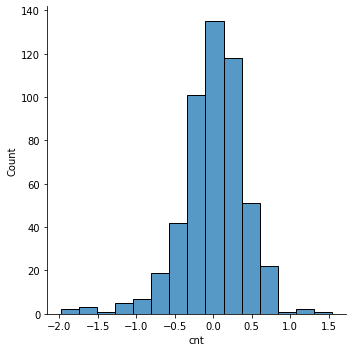

In [43]:
plt.figure(figsize = [12, 8])
sns.displot((y_train - y_train_pred), bins = 15)
plt.show()

In [32]:
df_test['temp'] = rs.fit_transform(df_test['temp'].values.reshape(-1,1))
df_test['atemp'] = rs.fit_transform(df_test['atemp'].values.reshape(-1,1))
df_test['hum'] = rs.fit_transform(df_test['hum'].values.reshape(-1,1))
df_test['windspeed'] = rs.fit_transform(df_test['windspeed'].values.reshape(-1,1))
df_test['cnt'] = rs.fit_transform(df_test['cnt'].values.reshape(-1,1))

In [33]:
y_test = df_test.pop("cnt")
X_test = df_test

In [34]:
train_col = X_train_rfe.columns
X_test_final = X_test[train_col]

In [35]:
y_test_pred = lm.predict(X_test_final)

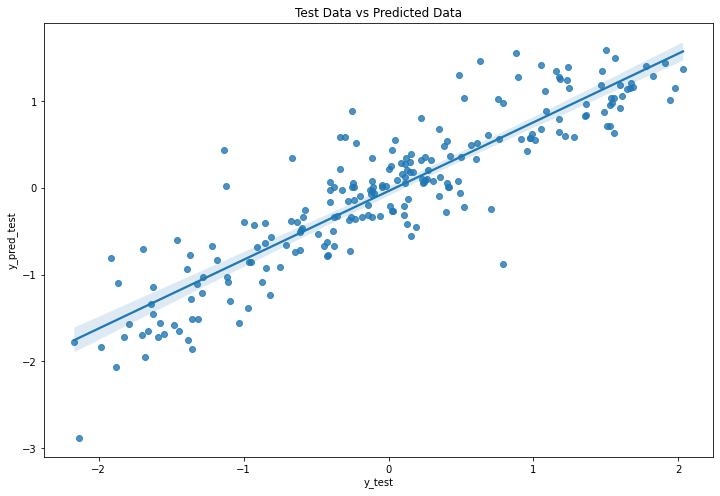

In [36]:
#Plotting a regplot for the same as above

plt.figure(figsize = [12, 8])
x = sns.regplot(x = y_test, y = y_test_pred)
x.set(xlabel = "y_test", ylabel = "y_pred_test", title = "Test Data vs Predicted Data")
plt.show()

In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
r2

0.8054348697435226

In [40]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.8302898137994594